In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm 
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 

In [2]:
df = pd.read_excel(r"F:\实验室\电网项目\服务器性能数据.xlsx", index_col=0)
df

,日期,DATA_DT,内存负载,主机CPU平均负载
0,2020-03-01 01:00:00,1582995600,81.8242,2.8333
1,2020-03-01 02:00:00,1582999200,81.8145,3.1818
2,2020-03-01 03:00:00,1583002800,81.8092,3.0833
3,2020-03-01 04:00:00,1583006400,81.8042,3.0833
4,2020-03-01 05:00:00,1583010000,81.8333,2.5000
...,...,...,...,...
2202,2020-05-31 19:00:00,1590922800,70.6183,2.0000
2203,2020-05-31 20:00:00,1590926400,70.5208,1.9167
2204,2020-05-31 21:00:00,1590930000,70.5608,1.7500
2205,2020-05-31 22:00:00,1590933600,70.5292,2.0000


In [155]:
df.loc[1767]

日期           2020-05-13 16:00:00
DATA_DT               1589356800
内存负载                     89.4667
主机CPU平均负载                    3.5
Name: 1767, dtype: object

In [156]:
arr1 = []
for i in range(92):
    arr1.append(df["内存负载"].loc[i*24+15])
arr1[73]

89.4667

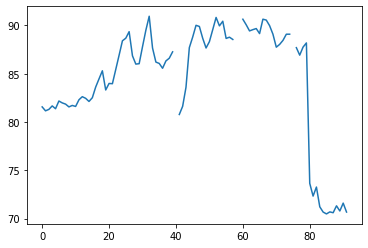

In [140]:
plt.plot(range(len(arr1)), arr1)

In [141]:
# k近邻法
def knn_mean(ts, n):
    out = np.copy(ts)
    for i, val in enumerate(ts):
        if np.isnan(val):
            n_by_2 = np.ceil(n / 2)
            lower = np.max([0, int(i - n_by_2)])
            upper = np.min([len(ts) + 1, int(i + n_by_2)])
            ts_near = np.concatenate([ts[lower:i], ts[i:upper]])
            out[i] = np.nanmean(ts_near)
    return out
# 使用k-近邻法填补缺失值
arr1 = knn_mean(arr1, 5)

In [142]:
train = arr1[:73]

In [143]:
test = arr1[73:]
test

array([89.085  , 89.0858 , 88.24582, 87.6925 , 86.9183 , 87.7483 ,
       88.1817 , 73.6433 , 72.3267 , 73.2625 , 71.2183 , 70.6742 ,
       70.4808 , 70.6892 , 70.6058 , 71.3183 , 70.7842 , 71.5983 ,
       70.6733 ])

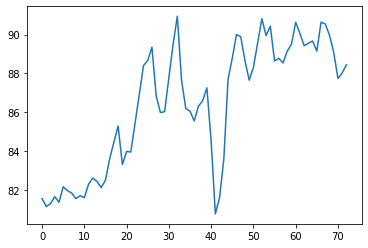

In [144]:
plt.plot(range(len(train)), train)

In [153]:
# 模型1
# model = sm.tsa.ARIMA(train, order=(10, 1, 11))
# result = model.fit()
# result.forecast()[0]
# 88.76133487
# 模型2
# model = sm.tsa.ARIMA(train, order=(10, 1, 12))
# result = model.fit()
# result.forecast()[0]
# 88.67568213
# 模型3
# model = sm.tsa.ARIMA(train, order=(10, 1, 11))
# result = model.fit()
# result.forecast()[0]
# 88.80482849
# 模型4
# model = sm.tsa.ARIMA(train, order=(10, 1, 15))
# result = model.fit()
# result.forecast()[0]
# 88.82377398
# 模型5
# model = sm.tsa.ARIMA(train, order=(10, 1, 17))
# result = model.fit()
# result.forecast()[0]
# 89.87014746
# 模型6
# model = sm.tsa.ARIMA(train, order=(10, 1, 11))
# result = model.fit()
# result.forecast()[0]
# 89.68174806
# 模型7
# model = sm.tsa.ARIMA(train, order=(11, 1, 11))
# result = model.fit()
# result.forecast()[0]
# 90.31510764
# 模型8
# model = sm.tsa.ARIMA(train, order=(13, 1, 10))
# result = model.fit()
# result.forecast()[0]
# 88.94456323
# 模型9
# model = sm.tsa.ARIMA(train, order=(12, 1, 12))
# result = model.fit()
# result.forecast()[0]
# 89.2641398
# 模型10
# model = sm.tsa.ARIMA(train, order=(5, 1, 3))
# result = model.fit()
# result.forecast()[0]
# 89.53729765
# 模型11
result = [88.76133487,88.67568213,88.80482849,88.82377398,89.87014746,89.68174806,90.31510764,88.94456323,89.2641398,89.53729765]

D:\Softwore\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Softwore\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


array([89.63952878])

In [146]:
trains = pd.DataFrame(train)
trains

,0
0,81.5600
1,81.1533
2,81.3000
3,81.6608
4,81.3708
...,...
68,89.9683
69,89.0833
70,87.7433
71,88.0300


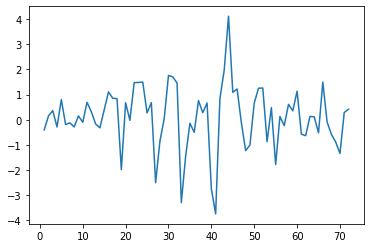

In [147]:
dif = trains.diff(1)
plt.plot( dif)

In [148]:
timeSeries = dif[1:]
adftest = ts.adfuller(timeSeries)
adftest

(-7.704818094523225,
 1.3101065587099357e-11,
 2,
 69,
 {'1%': -3.528889992207215,
  '5%': -2.9044395987933362,
  '10%': -2.589655654274312},
 188.97644109002277)

D:\Softwore\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


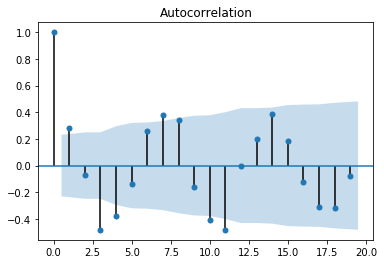

In [149]:
plot_acf(timeSeries).show()

D:\Softwore\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


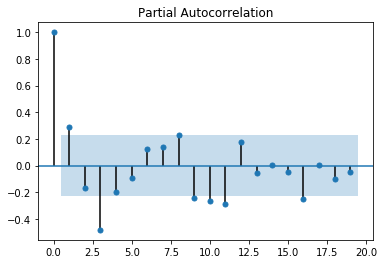

In [150]:
plot_pacf(timeSeries).show()

In [151]:
#设置遍历循环的初始条件，以热力图的形式展示，跟AIC定阶作用一样
p_min = 11
q_min = 11
p_max = 13
q_max = 14
d_min = 0
d_max = 1
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
results_bic

,MA11,MA12,MA13,MA14
AR11,NaN,NaN,NaN,NaN
AR12,NaN,NaN,NaN,NaN
AR13,NaN,NaN,NaN,NaN


D:\Softwore\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Softwore\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


循环2次


D:\Softwore\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Softwore\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


循环3次


D:\Softwore\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
D:\Softwore\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


循环4次
循环5次


D:\Softwore\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\Softwore\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1, 'BIC')

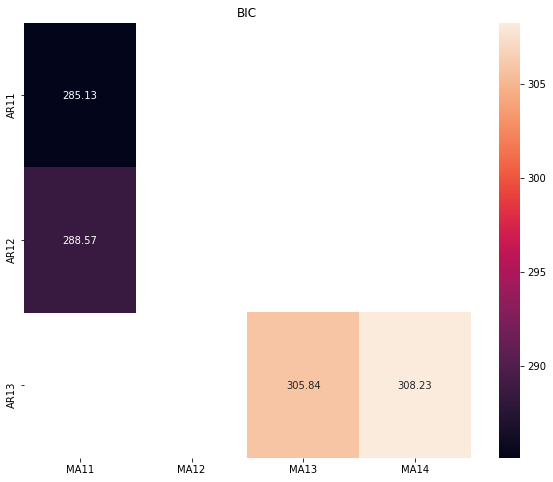

In [152]:
import statsmodels.api as sm
import itertools
import seaborn as sns
num = 1
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(timeSeries, order=(p, d, q),
#                                enforce_stationarity=False,
#                                enforce_invertibility=False,
                              )
        results = model.fit()
        num += 1
        print(f"循环{num}次")
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')

模型1
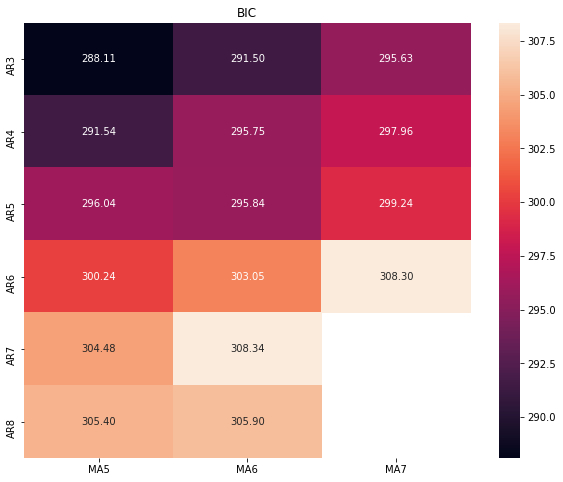

模型2
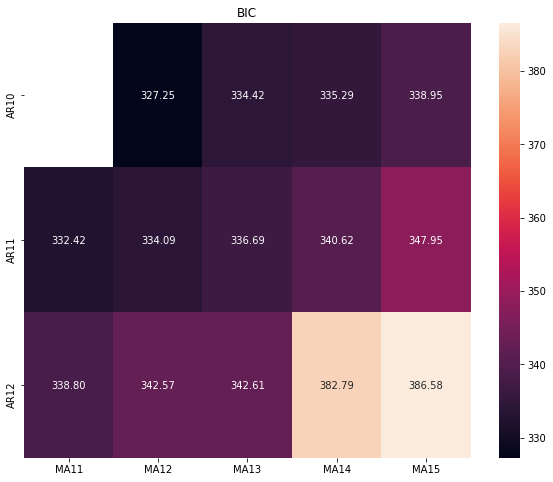

模型3
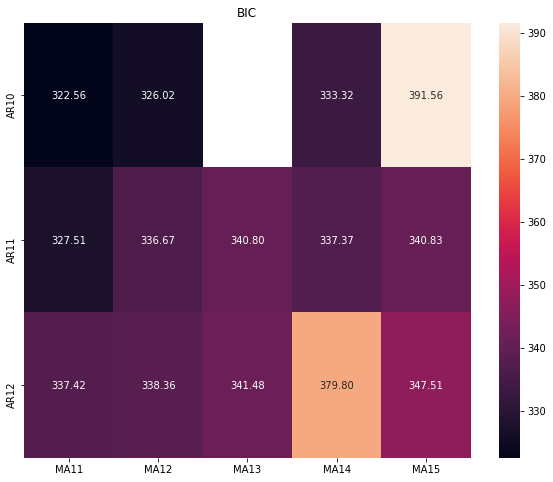

In [ ]:
error = [1:88.76133487,      10:89.53729765]
